# Calibration of the hyper-parameters of a gaussian process regressor by maximum likelihood

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats 
from scipy.optimize import minimize_scalar

from utils import *

## Définition des paramètres

In [2]:
N = 1000
X = np.linspace(0, 1, N)
lbda = 0.05
X[:10]

array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901])

### 1) a)

<AxesSubplot:>

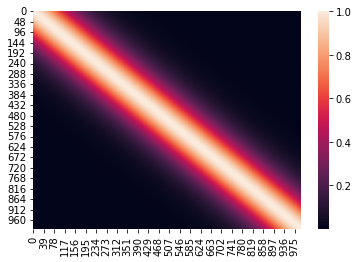

In [3]:
sigma = sigmaKov(X, lbda, kov)
sns.heatmap(sigma)

<AxesSubplot:>

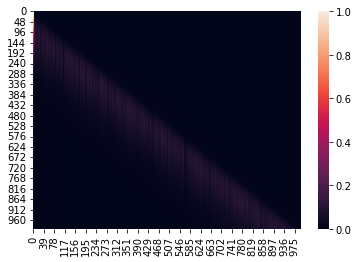

In [4]:
L = np.linalg.cholesky(sigma)
sns.heatmap(L)

In [5]:
L

array([[1.00000015e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99933059e-01, 1.15927203e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99732757e-01, 2.30637768e-02, 1.82825058e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.29869928e-07, 5.23266182e-07, 1.19103494e-07, ...,
        1.49495278e-03, 0.00000000e+00, 0.00000000e+00],
       [3.23934165e-07, 5.13899686e-07, 1.16975639e-07, ...,
        1.31542087e-03, 1.47753322e-03, 0.00000000e+00],
       [3.18104662e-07, 5.04699884e-07, 1.14885571e-07, ...,
        1.88945320e-03, 1.51038135e-03, 1.39606666e-03]])

Que vaut $m + L^t G$ ?

1) b)

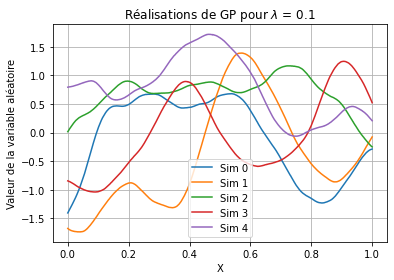

In [6]:
simulGP_gauss(X, 1000, 0.1)

### Question 2)

In [12]:
N = 100
X = np.linspace(0, 1, N)
Z = np.sin(4 * np.pi * draw_uniform_in_intervals(N+1))
lbda=0.05

In [13]:
logf(lbda, X, Z, N)

1370.8201555868939

In [14]:
minimize_scalar(logf, args=(X, Z, N))

     fun: -480215354.4769738
    nfev: 28
     nit: 23
 success: True
       x: -3.4936240587137344

In [ ]:
def simulGP_sin(X, N, lbda):
    X_random = draw_uniform_in_intervals(N+1)
    Xsin = np.sin(4*np.pi*X_random)
    sigma = sigmaKov(Xsin, lbda, kov)
    L = np.linalg.cholesky(sigma)
    #Lt = L.T
    fig, ax = plt.subplots()
    plt.xlabel("X")
    plt.ylabel("Valeur de la variable aléatoire")
    plt.title(r"Réalisations de GP pour $\lambda$ = " + str(lbda))
    for i in range(2):
        g = np.random.normal(size=N)
        
        z = L @ g 
        #display(z.round(2))
        ax.plot(X_random, z, label = f"Sim {i}")
    ax.plot(X_random, Xsin, label = "Sinus")
    plt.legend()
    plt.grid()
    plt.show()



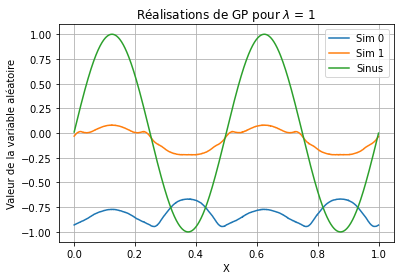

In [ ]:
#minimize_scalar(neglikelihood, args=(Z))
simulGP_sin(X, N, 1)

In [ ]:
N = 10
X = np.linspace(0, 1, N)
lbda = 0.1

sigma = sigmaKov(X, lbda, kov)
sigma

array([[1.00000059, 0.83043334, 0.52756943, 0.28671321, 0.14126184,
        0.0651161 , 0.02861069, 0.01212518, 0.00499608, 0.00201273],
       [0.83043334, 1.00000025, 0.83043334, 0.52756943, 0.28671321,
        0.14126184, 0.0651161 , 0.02861069, 0.01212518, 0.00499608],
       [0.52756943, 0.83043334, 1.00000094, 0.83043334, 0.52756943,
        0.28671321, 0.14126184, 0.0651161 , 0.02861069, 0.01212518],
       [0.28671321, 0.52756943, 0.83043334, 1.00000006, 0.83043334,
        0.52756943, 0.28671321, 0.14126184, 0.0651161 , 0.02861069],
       [0.14126184, 0.28671321, 0.52756943, 0.83043334, 1.00000091,
        0.83043334, 0.52756943, 0.28671321, 0.14126184, 0.0651161 ],
       [0.0651161 , 0.14126184, 0.28671321, 0.52756943, 0.83043334,
        1.00000014, 0.83043334, 0.52756943, 0.28671321, 0.14126184],
       [0.02861069, 0.0651161 , 0.14126184, 0.28671321, 0.52756943,
        0.83043334, 1.00000019, 0.83043334, 0.52756943, 0.28671321],
       [0.01212518, 0.02861069, 0.0651161

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, cm
from mpl_toolkits.mplot3d import Axes3D


# ------------------------------------------
#  GPs for regression utils
# ------------------------------------------

def kernel(X1, X2, l=1.0, sigma_f=1.0):
    """
    Isotropic squared exponential kernel.
    
    Args:
        X1: Array of m points (m x d).
        X2: Array of n points (n x d).

    Returns:
        (m x n) matrix.
    """
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return sigma_f**2 * np.exp(-0.5 / l**2 * sqdist)

def plot_gp(mu, cov, X, X_train=None, Y_train=None, samples=[]):
    X = X.ravel()
    mu = mu.ravel()
    uncertainty = 1.96 * np.sqrt(np.diag(cov))
    
    plt.fill_between(X, mu + uncertainty, mu - uncertainty, alpha=0.1)
    plt.plot(X, mu, label='Mean')
    for i, sample in enumerate(samples):
        plt.plot(X, sample, lw=1, ls='--', label=f'Sample {i+1}')
    if X_train is not None:
        plt.plot(X_train, Y_train, 'rx')
    plt.legend()



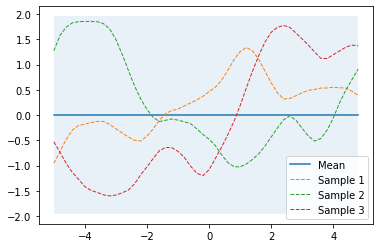

In [ ]:
%matplotlib inline

# Finite number of points
X = np.arange(-5, 5, 0.2).reshape(-1, 1)

# Mean and covariance of the prior
mu = np.zeros(X.shape)
cov = sigmaKov(X, 0.75, kov)

# Draw three samples from the prior
samples = np.random.multivariate_normal(mu.ravel(), cov, 3)

# Plot GP mean, uncertainty region and samples 
plot_gp(mu, cov, X, samples=samples)